In [3]:
# that that we have a working class, let's look at some of the functionality we might want to incorporate
# we'll use a random file in from the 13 files in this repo as data
import pandas as pd
import numpy as np

# import our Tweet class
from Tweet import Tweet

# pick an random file
num = np.random.randint(1,13)
print(num)

8


In [4]:
# pandas display options
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 100

In [5]:
# define fields wanted and dtypes
# by default, we'll just get text and id
columns = {
# 'external_author_id'  :  ,
# 'author'  :  ,
'content'  :  str,
# 'region'  :  ,
# 'language'  :  ,
# 'publish_date'  :  ,
# 'harvested_date'  :  ,
# 'following'  :  ,
# 'followers'  :  ,
# 'updates'  :  ,
# 'post_type'  :  ,
# 'account_type'  :  ,
# 'retweet'  :  ,
# 'account_category'  :  ,
# 'new_june_2018'  :  ,
# 'alt_external_id'  :  ,
'tweet_id'  :  'int64',
# 'article_url'  :  ,
# 'tco1_step1'  :  ,
# 'tco2_step1'  :  ,
# 'tco3_step1'
}

In [30]:
# download directly
tweets = pd.read_csv(f"https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_{num}.csv",
                     usecols=columns.keys(),
                     dtype=columns,
                     nrows=100);

In [31]:
# fit some tweets
tweets['Tweet'] = tweets.content.apply(Tweet)
for i,t in tweets.Tweet.iteritems():
    t.fit()

In [32]:
tweets['is_complex'] = tweets.Tweet.apply(lambda x: getattr(x, 'is_complex_'))

In [37]:
tweets['emoji'] = tweets.Tweet.apply(lambda x: getattr(x, 'emojis_'))

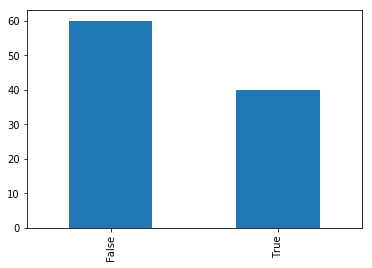

In [38]:
tweets.is_complex.value_counts().plot(kind='bar')

In [42]:
tweets.head()

,content,tweet_id,Tweet,is_complex,emoji
0,#mar RT theglobaluniter: This message is for the .GOP Your constituents are going in the wrong direction #WeThePeople demand… …,891623201150840832,<Tweet.Tweet object at 0x118d8c198>,True,[]
1,#mar RT jbwredsox: Hillary #UnlikelyBabyNames (people like winners) #just,891627271110479873,<Tweet.Tweet object at 0x118d8c6d8>,True,[]
2,#mar RT gr8tjude: GALLERY: US vice president's plane lands in Tallinn https://t.co/ZFqn5ItNgW #ERR #just,891627273891311617,<Tweet.Tweet object at 0x118d8c208>,False,[]
3,#mar RT ClubSpeaks: ROCKONDUDE2 https://t.co/NhQjawicay #just,891631307104677888,<Tweet.Tweet object at 0x118d8c278>,False,[]
4,#mar RT Lrihendry: John McCain missed an opportunity to go out with a resounding impact... oh wait... #just,891633354256285696,<Tweet.Tweet object at 0x118d8c2e8>,False,[]


In [49]:
# one obvious task is to clean up the RT strings
# let's do this by extended our class functionality
class Tweet_extended(Tweet):
    
    def find_RT_str(self):
        # if tweet contains 'RT', extract subtring up to first ':'
        t = self.text_
        if 'RT' in t:
            border = t.find(':')
            rt_str = t[:border]
            self.rt_str_ = rt_str
        else:
            self.rt_str_ = None

In [50]:
# test new extended class functionality
tweets['Tweet'] = tweets.content.apply(Tweet_extended)
for i,t in tweets.Tweet.iteritems():
    t.find_RT_str()

In [51]:
tweets['RT_str'] = tweets.Tweet.apply(lambda x: getattr(x, 'rt_str_'))

In [52]:
tweets

,content,tweet_id,Tweet,is_complex,emoji,RT_str
0,#mar RT theglobaluniter: This message is for the .GOP Your constituents are going in the wrong direction #WeThePeople demand… …,891623201150840832,<__main__.Tweet_extended object at 0x11b0dbc88>,True,[],#mar RT theglobaluniter
1,#mar RT jbwredsox: Hillary #UnlikelyBabyNames (people like winners) #just,891627271110479873,<__main__.Tweet_extended object at 0x11b0db710>,True,[],#mar RT jbwredsox
2,#mar RT gr8tjude: GALLERY: US vice president's plane lands in Tallinn https://t.co/ZFqn5ItNgW #ERR #just,891627273891311617,<__main__.Tweet_extended object at 0x11b0dbf98>,False,[],#mar RT gr8tjude
3,#mar RT ClubSpeaks: ROCKONDUDE2 https://t.co/NhQjawicay #just,891631307104677888,<__main__.Tweet_extended object at 0x11b0dbf60>,False,[],#mar RT ClubSpeaks
4,#mar RT Lrihendry: John McCain missed an opportunity to go out with a resounding impact... oh wait... #just,891633354256285696,<__main__.Tweet_extended object at 0x11b0dbef0>,False,[],#mar RT Lrihendry
5,#mar RT ROCKONDUDE2: Well what did you expect? When you disrespect the flag you disrespect America? Thats why the ratings were down last… …,891633357402099713,<__main__.Tweet_extended object at 0x11b0dbe80>,False,[],#mar RT ROCKONDUDE2
6,#mar RT MADE__USA: BREAKING: Mike Pence Just Overturned Obama’s Major Administration Rule – Obama Is Done! - Click to see also ☛ …,891633351358074880,<__main__.Tweet_extended object at 0x11b0dbe48>,False,[],#mar RT MADE__USA
7,#mar RT Browns: 🚨 LIVE from the Puppy Pound! 🚨 https://t.co/2EjSx4kq9d #just,891633359499255808,<__main__.Tweet_extended object at 0x11b0dbd30>,True,"[🚨, 🚨]",#mar RT Browns
8,#mar RT gr8tjude: Listen: Sebastian Gorka delivers masterful defense of Trump’s military transgender ban https://t.co/IY24R6qLQ3 via chris…,891633361592209408,<__main__.Tweet_extended object at 0x11b0db9e8>,True,[],#mar RT gr8tjude
9,#mar RT ROCKONDUDE2: There used to be a time here in America where no one was above the law! #PresidentTrump #DrainTheSwamp &amp; hold these… …,891635375361404928,<__main__.Tweet_extended object at 0x11b0dbc18>,True,[],#mar RT ROCKONDUDE2
